In [7]:
import os
import laspy as lp
import numpy as np
import pylas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

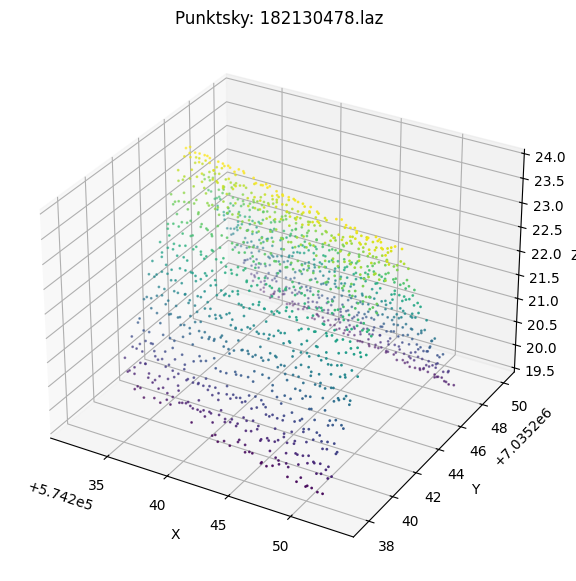

{'182130478.laz': {'point_count': 1431}}


In [9]:
#Leser filer fra eksempelmappen og plotter punktskyene- ser at vi får tak 


folder = "sample_roofdata_50"

# Opprett en tom dictionary for å lagre informasjonen
roofs_dict = {}

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien ved å kombinere mappen og filnavnet
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og hent informasjon
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            point_count = fh.header.point_count
            
            # Legg til informasjon i dictionary
            roofs_dict[roof] = {
                "point_count": point_count
            }

            las_data = fh.read()
            x = las_data.x
            y = las_data.y
            z = las_data.z

        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, s=1, c=z, cmap='viridis')  # s=1 betyr små punkter, c=z farger punktene basert på høyde
        ax.set_title(f"Punktsky: {roof}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.show()
        break #hvis du vil se alle 50 takene, fjern denne 


# Skriv ut dictionary for å verifisere
print(roofs_dict)